# **Customer Churn Analysis**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Define Churn for Your Business:**

Churn Definition: Churn occurs when a customer stops purchasing or engaging with your business. For your e-commerce data, a customer could be considered "churned" if they have not made a purchase within a certain period (e.g., 6 months or 1 year).

**2. Prepare Data for Churn Analysis:**

To perform churn analysis, you need to determine the last purchase date for each customer and define a threshold period to classify them as churned or retained.

In [29]:
# Load your data
data = pd.read_csv('e_commerce_no_missing_values.csv')
# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# Identify the last purchase date for each customer
data['LastPurchaseDate'] = data.groupby('CustomerID')['InvoiceDate'].transform('max')

# Define a churn period (e.g., 6 months)
churn_period = pd.Timedelta(days=180)  # 6 months

# Define the end date for analysis (e.g., the last date in your dataset)
end_date = data['InvoiceDate'].max()

# Determine if each customer is churned (True if the last purchase is beyond the churn period)
data['Churned'] = (end_date - data['LastPurchaseDate'] > churn_period)

# Create a cohort based on the month of the first purchase
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

**3. Calculate Cohort Churn Rates:**

Calculate the churn rate for each cohort. The churn rate is the percentage of customers in a cohort who have churned over a specific period.

In [30]:
# Create a DataFrame for churn analysis
churn_data = data.groupby(['CohortMonth', 'CustomerID']).agg({
    'InvoiceDate': 'min',   # First purchase date
    'Churned': 'max'        # Churn status
}).reset_index()

# Calculate the number of churned and total customers per cohort
cohort_churn = churn_data.groupby('CohortMonth').agg(
    total_customers=('CustomerID', 'nunique'),
    churned_customers=('Churned', 'sum')
).reset_index()

# Calculate churn rate for each cohort
cohort_churn['ChurnRate'] = (cohort_churn['churned_customers'] / cohort_churn['total_customers']) * 100

In [31]:
cohort_churn

,CohortMonth,total_customers,churned_customers,ChurnRate
0,2009-12,1045,360,34.449761
1,2010-01,394,190,48.223350
2,2010-02,363,177,48.760331
3,2010-03,436,225,51.605505
4,2010-04,291,150,51.546392
5,2010-05,254,142,55.905512
6,2010-06,269,154,57.249071
7,2010-07,183,98,53.551913
8,2010-08,158,80,50.632911
9,2010-09,242,129,53.305785


**4. Visualize Cohort Churn Rate:**

Visualize the churn rate using a heatmap.

In [49]:
# Load your data
data = pd.read_csv('e_commerce_no_missing_values.csv')
# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# Identify the cohort month (first purchase month) for each customer
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
# Extract the year and month from 'InvoiceDate' for grouping
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')
# Create a period number for each transaction representing the number of months since the first purchase
data['CohortIndex'] = (data['YearMonth'] - data['CohortMonth']).apply(lambda x: x.n)

In [50]:
# Determine if each customer is churned (True if no purchase in the last period)
churn_period = pd.Timedelta(days=180)  # 6 months
end_date = data['InvoiceDate'].max()
data['FirstPurchaseDate'] = data.groupby('CustomerID')['InvoiceDate'].transform('min')
data['LastPurchaseDate'] = data.groupby('CustomerID')['InvoiceDate'].transform('max')
data['Churned'] = (end_date - data['LastPurchaseDate'] > churn_period)

In [51]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,CohortMonth,YearMonth,CohortIndex,FirstPurchaseDate,LastPurchaseDate,Churned
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12,2009-12,0,2009-12-01 07:45:00,2011-07-05 12:11:00,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12,2009-12,0,2009-12-01 07:45:00,2011-07-05 12:11:00,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12,2009-12,0,2009-12-01 07:45:00,2011-07-05 12:11:00,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12,2009-12,0,2009-12-01 07:45:00,2011-07-05 12:11:00,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12,2009-12,0,2009-12-01 07:45:00,2011-07-05 12:11:00,False


In [54]:
# Prepare data for cohort analysis
cohort_data = data.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
# Pivot table to create a matrix of cohorts by month
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [55]:
cohort_pivot

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,...,319.0,273.0,316.0,303.0,287.0,274.0,332.0,319.0,427.0,218.0
2010-01,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,...,60.0,86.0,74.0,69.0,73.0,93.0,73.0,88.0,29.0,NaN
2010-02,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,...,74.0,67.0,61.0,53.0,85.0,90.0,62.0,23.0,NaN,NaN
2010-03,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,50.0,...,74.0,76.0,69.0,74.0,89.0,93.0,33.0,NaN,NaN,NaN
2010-04,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,33.0,34.0,...,43.0,41.0,41.0,50.0,61.0,19.0,NaN,NaN,NaN,NaN
2010-05,254.0,49.0,45.0,49.0,48.0,66.0,56.0,33.0,17.0,22.0,...,33.0,36.0,42.0,40.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06,269.0,58.0,53.0,55.0,62.0,76.0,35.0,25.0,22.0,32.0,...,33.0,37.0,55.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,183.0,38.0,37.0,52.0,55.0,28.0,21.0,28.0,26.0,22.0,...,32.0,45.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,158.0,39.0,50.0,51.0,29.0,21.0,16.0,22.0,23.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Calculate churn rates by dividing the number of churned customers by total customers for each cohort
cohort_size = cohort_pivot.iloc[:, 0]
churn_matrix = (1 - (cohort_pivot.divide(cohort_size, axis=0))) * 100
churn_matrix

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,0.0,62.488038,65.741627,57.224880,60.765550,60.956938,60.956938,64.210526,66.028708,62.488038,...,69.473684,73.875598,69.760766,71.004785,72.535885,73.779904,68.229665,69.473684,59.138756,79.138756
2010-01,0.0,78.172589,69.796954,69.543147,72.081218,70.812183,73.350254,76.903553,71.065990,65.989848,...,84.771574,78.172589,81.218274,82.487310,81.472081,76.395939,81.472081,77.664975,92.639594,NaN
2010-02,0.0,69.972452,77.410468,69.696970,74.380165,79.063361,78.236915,71.625344,72.451791,70.798898,...,79.614325,81.542700,83.195592,85.399449,76.584022,75.206612,82.920110,93.663912,NaN,NaN
2010-03,0.0,78.211009,74.082569,76.376147,77.064220,80.045872,75.917431,70.183486,71.100917,88.532110,...,83.027523,82.568807,84.174312,83.027523,79.587156,78.669725,92.431193,NaN,NaN,NaN
2010-04,0.0,76.975945,80.068729,83.848797,81.443299,76.975945,72.852234,73.883162,88.659794,88.316151,...,85.223368,85.910653,85.910653,82.817869,79.037801,93.470790,NaN,NaN,NaN,NaN
2010-05,0.0,80.708661,82.283465,80.708661,81.102362,74.015748,77.952756,87.007874,93.307087,91.338583,...,87.007874,85.826772,83.464567,84.251969,95.275591,NaN,NaN,NaN,NaN,NaN
2010-06,0.0,78.438662,80.297398,79.553903,76.951673,71.747212,86.988848,90.706320,91.821561,88.104089,...,87.732342,86.245353,79.553903,94.052045,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,0.0,79.234973,79.781421,71.584699,69.945355,84.699454,88.524590,84.699454,85.792350,87.978142,...,82.513661,75.409836,90.710383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,0.0,75.316456,68.354430,67.721519,81.645570,86.708861,89.873418,86.075949,85.443038,86.708861,...,79.746835,93.037975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


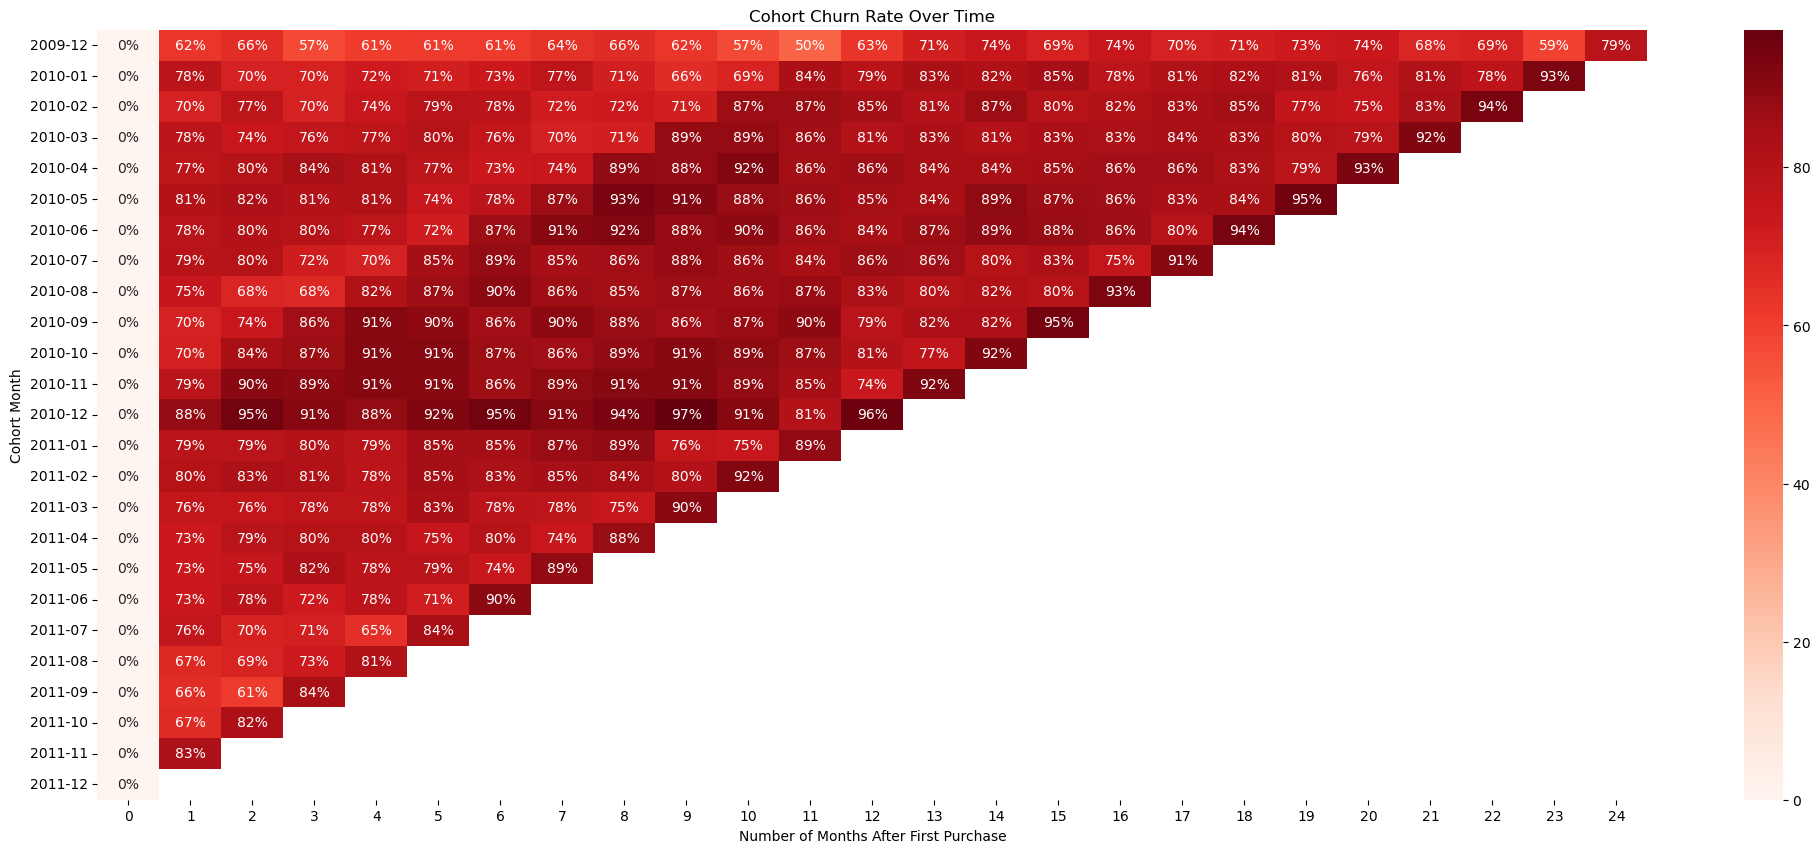

In [62]:
# Define a function to add the '%' sign to annotations using `map()`
def annotate_heatmap(data, **kwargs):
    # Create a mask for where to display the data
    labels = data.map(lambda x: '{:.0f}%'.format(x))
    sns.heatmap(data, annot=labels, fmt='', **kwargs)

# Create the heatmap with percentage signs
plt.figure(figsize=(25, 10))
annotate_heatmap(churn_matrix, cmap='Reds')

plt.title('Cohort Churn Rate Over Time')
plt.xlabel('Number of Months After First Purchase')
plt.ylabel('Cohort Month')
plt.show()

**Additional Analysis:**

+ Churn Segmentation: Analyze churn rates by different segments, such as customer demographics, acquisition channels, or product categories, to identify which groups are more likely to churn.
+ Predictive Modeling: Build machine learning models to predict customer churn using features such as purchase frequency, recency, and customer demographics.
+ Behavioral Analysis: Understand patterns in customer behavior (e.g., purchasing habits) that correlate with churn.

**Outcome:**

By analyzing customer churn rates with cohort analysis, you can identify patterns in customer attrition, understand which customer groups are at risk, and develop targeted retention strategies to reduce churn.